In [1]:
!pip3 install pyLDAvis 
!pip3 install spacy
!python3 -m spacy download en_core_web_md 

  Using cached spacy-3.0.6-cp38-cp38-manylinux2014_x86_64.whl (13.0 MB)
  Using cached pydantic-1.7.4-cp38-cp38-manylinux2014_x86_64.whl (12.3 MB)
  Using cached cymem-2.0.5-cp38-cp38-manylinux2014_x86_64.whl (35 kB)
     |████████████████████████████████| 130 kB 252 kB/s eta 0:00:01
     |████████████████████████████████| 628 kB 73 kB/s eta 0:00:013
  Using cached typer-0.3.2-py3-none-any.whl (21 kB)
  Using cached tqdm-4.61.1-py2.py3-none-any.whl (75 kB)
  Using cached murmurhash-1.0.5-cp38-cp38-manylinux2014_x86_64.whl (20 kB)
  Using cached catalogue-2.0.4-py3-none-any.whl (16 kB)
     |████████████████████████████████| 42 kB 44 kB/s eta 0:00:01
  Using cached spacy_legacy-3.0.6-py2.py3-none-any.whl (12 kB)
  Using cached srsly-2.4.1-cp38-cp38-manylinux2014_x86_64.whl (458 kB)
  Using cached blis-0.7.4-cp38-cp38-manylinux2014_x86_64.whl (9.8 MB)
     |████████████████████████████████| 82 kB 35 kB/s  eta 0:00:01
     |████████████████████████████████| 113 kB 226 kB/s eta 0:00:01
  C

In [4]:
!python3 -m spacy download en_core_web_md 

/root/anaconda3/bin/python3: No module named spacy


In [1]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import string
import spacy
import gensim
from gensim import corpora
import pandas as pd
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns

/root/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/root/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [3]:
df = pd.read_csv('./clean_processed_tweet_data.csv')

In [4]:
df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548.0,612.0,ketuesriche,551,351,NaN,[],NaN,Mass
1,1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195.0,92.0,Grid1949,66,92,NaN,[],NaN,"Edinburgh, Scotland"
2,2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2.0,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [87, 100]}]",NaN,NaN
3,3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580.0,899.0,RIPNY08,2666,2704,NaN,"[{'text': 'Covid19', 'indices': [145, 153]}]",NaN,NaN
4,4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72.0,20.0,pash22,28250,30819,NaN,[],NaN,United Kingdom


In [5]:
Clean_Tweet = df[['original_text','polarity']]

In [6]:
Clean_Tweet.head()

,original_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [7]:
def text_category (p):
    if p > 0:
        return 'positive'
    if p < 0:
        return 'negative'
    else:
        return 'neutral'

In [8]:
score = pd.Series([text_category(row_value) for row_value in Clean_Tweet['polarity']])

In [9]:
Clean_Tweet = pd.concat([Clean_Tweet, score.rename("score")], axis=1)

In [10]:
Clean_Tweet.head()

,original_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


In [11]:
len(Clean_Tweet['polarity'])

6225

[Text(0, 0, 'neutral'), Text(0, 0, 'positive'), Text(0, 0, 'negative')]

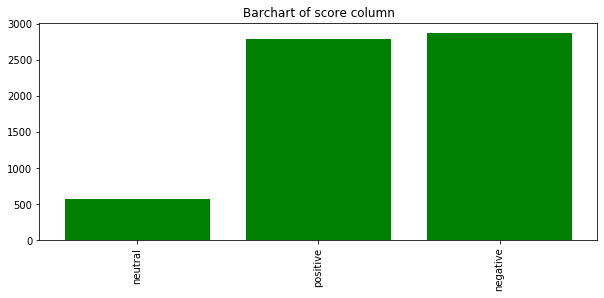

In [12]:
labels = ['neutral', 'positive', 'negative']
positive = len(Clean_Tweet[Clean_Tweet['score'] == "positive"])
neutral = len(Clean_Tweet[Clean_Tweet['score'] == "neutral"])
negative = len(Clean_Tweet[Clean_Tweet['score'] == "negative"])
fig, ax = plt.subplots(1, 1, figsize = (10,4))
ax.bar(x=labels, height=[negative, positive, neutral], color='green')
ax.set_title('Barchart of score column')
ax.set_xticklabels(labels, rotation=90)

In [13]:
Clean_Tweet = Clean_Tweet.drop(Clean_Tweet[Clean_Tweet.score == 'neutral'].index)
scoremap = pd.Series([1 if row_val == 'positive' else 0 for row_val in Clean_Tweet['score']])
Clean_Tweet['scoremap'] = scoremap

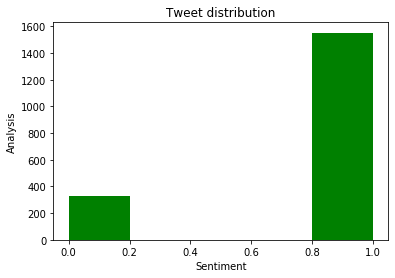

In [14]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(Clean_Tweet['scoremap'],bins = 5,color='green')

plt.title('Tweet distribution')
plt.xlabel('Sentiment')
plt.ylabel('Analysis')
plt.show()

In [15]:
Clean_Tweet.dropna(axis = 0, how ='any',inplace=True)

In [16]:
Clean_Tweet['original_text'][100:110]

154    Yet another amazingly qualified and courageous...
155    "Africa is in the midst of a full-blown third ...
156    We are dying! Ugandans need the world to stand...
157    A new @EurobarometerEU survey shows 79% of Eur...
159    17 June 2021: #COVID19 in South Africa 🇿🇦\n\nD...
161    You can get a #COVID19 vaccine and other vacci...
162    Dr Moeti is head of WHO in Africa, and one of ...
164    Israel will deliver more than a million doses ...
165    Covid vaccines in healthy young people poses a...
167    "Africa is in the midst of a full-blown third ...
Name: original_text, dtype: object

In [17]:
Clean_Tweet['original_text']= Clean_Tweet['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
Clean_Tweet['original_text']=Clean_Tweet['original_text'].astype(str)
Clean_Tweet['original_text'] = Clean_Tweet['original_text'].apply(lambda x: x.lower())

In [18]:
!pip install nltk

In [39]:
pip install spacy

     |████████████████████████████████| 12.8 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 618 kB 2.1 MB/s eta 0:00:01
  Using cached spacy_legacy-3.0.6-py2.py3-none-any.whl (12 kB)
  Using cached pathy-0.5.2-py3-none-any.whl (42 kB)
  Using cached wasabi-0.8.2-py3-none-any.whl (23 kB)
     |████████████████████████████████| 126 kB 2.0 MB/s eta 0:00:01
  Using cached typer-0.3.2-py3-none-any.whl (21 kB)
     |████████████████████████████████| 9.1 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 456 kB 1.6 MB/s eta 0:00:01
  Using cached catalogue-2.0.4-py3-none-any.whl (16 kB)
  Using cached smart_open-3.0.0.tar.gz (113 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=9f0fb076b6ac524abb124f19755e16740677d4e40815ed73856bfc2d813db87d
  Stored in directory: /root/.cache/pip/wheels/83/a6

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

In [20]:
Clean_Tweet['original_text']=Clean_Tweet['original_text'].apply(remove_stopwords)

In [22]:
!python3 -m spacy download en_core_web_md 

     |████████████████████████████████| 47.1 MB 6.6 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [23]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [24]:
text_list=Clean_Tweet['original_text'].tolist()
tokenized_reviews = lemmatization(text_list)


In [25]:
tokenized_reviews[5]

['pleased',
 'welcome',
 'wecandothis',
 'bus',
 'atlanta',
 'today',
 'easy',
 'way',
 'covid19',
 'vaccine',
 'search',
 'httpstcod2pdwips8o',
 '📱',
 'text',
 'zip',
 'code',
 'httpstcoammcmmctip']

In [26]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=500, passes=50,iterations=100)

In [27]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.157630 -0.025298       1        1  23.600084
3      0.184731 -0.167963       2        1  19.529685
0      0.155844 -0.046428       3        1  19.272469
2     -0.238542 -0.071225       4        1  19.268114
1      0.055596  0.310915       5        1  18.329649, topic_info=           Term        Freq        Total Category  logprob  loglift
0        africa  805.000000   805.000000  Default  30.0000  30.0000
1          case  320.000000   320.000000  Default  29.0000  29.0000
11         wave  280.000000   280.000000  Default  28.0000  28.0000
10        third  263.000000   263.000000  Default  27.0000  27.0000
23   production  167.000000   167.000000  Default  26.0000  26.0000
..          ...         ...          ...      ...      ...      ...
219        life   26.091648    39.786504   Topic5  -5.3122   1.2747
58      covid19   61.222524  1187.497791   Topic5  -4.4593  -1.2684
193       world   39.575990   326.156789   Topic5  -4.8956  -0.4125
4         death   30.337785   163.649080   Topic5  -5.1614   0.0113
199      people   30.395822   192.297188   Topic5  -5.1595  -0.1481

[250 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
271       1  0.969223        1st
126       2  0.993775     action
411       4  0.984202    adverse
0         2  0.253221     africa
0         3  0.121645     africa
...     ...       ...        ...
371       3  0.955917  yesterday
1190      3  0.963796       york
437       5  0.976791      young
82        2  0.993367        zip
83        2  0.991383          📱

[252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 3, 2])

In [28]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.307408717085273

Coherence Score:  0.43362051310029537
